In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../mplstyles/stylelib/standard.mplstyle')

#other computational libraries
import numpy as np

# Summary

We know that the Dogherty (1992) paper [[Dough92][Dough92]] has measured the ionization variance for nuclear recoils in silicon. And that this paper has compared to results to the Lindhard description (J. Lindhard _et al_., Mat. Fys. Medd. K. Dan. Vidensk. Selsk **33**, 10 (1963)). In addition the paper of Gerbier (1990) [[Gerb90][Gerb90]] also contains direct information on the variance of the ionization signal for nuclear recoils. The purpose of this note is to recast these results in terms of the effective Fano factor and make it clear where we got the information from, and how the data was processed. 

[Dough92]: https://journals.aps.org/pra/abstract/10.1103/PhysRevA.45.2104 "Dougherty paper 1992"
[Gerb90]: https://journals.aps.org/prd/abstract/10.1103/PhysRevD.42.3211 "Gerbier paper 1990"

# Extracting the Lindhard Function(s)

The note `lindhard_SiGe.ipynb` clearly explains how the Lindhard predictions were extracted from the paper (NAC III). Below we reproduce part of that to get the functions ready for plotting. 

In [2]:
import dataPython as dp

lind_data0 = dp.getXYdata('data/lindhard2_OmegaepsD_fmt.txt')
lind_data1 = dp.getXYdata('data/lindhard2_OmegaepsE_fmt.txt')

lindD_e = np.asarray(lind_data0['xx'])
lindD = np.asarray(lind_data0['yy'])
lindE_e = np.asarray(lind_data1['xx'])
lindE = np.asarray(lind_data1['yy'])

In [3]:
#we can make useful helper functions
Esi = np.vectorize(lambda x: np.sqrt(2)*2*x/(6.87758e-2))

In [4]:
#create a yield model
import lindhard as lind

#lindhard
lpar_Si = lind.getLindhardPars('Si',True) #use the "calculated" value of k
print(lpar_Si)

ylindSi = lind.getLindhard(lpar_Si)

#If you want to set by k value alone
#ylindSi = lind.getLindhardSi_k(0.15)

ylindSiv = np.vectorize(ylindSi) #careful, this expects inputs in eV

{'Z': 14, 'A': 28, 'k': 0.14600172346755985, 'a': 3.0, 'b': 0.15, 'c': 0.7, 'd': 0.6}


In [5]:
#epsg also depends on material
#use Knoll, Radiation Detection and Measurement, 4th edition, pg 368
#actually these look out of date--need to find references for these values that "I think I know"
epsg_Si = 3.8e-3 #keV average energy per electron-hole pair created


F_D_Si = Esi(lindD_e)*(1/(epsg_Si*ylindSiv(1000*Esi(lindD_e))))*lindD
F_E_Si = Esi(lindE_e)*(1/(epsg_Si*ylindSiv(1000*Esi(lindE_e))))*lindE

# Dougherty & Gerbier Data

The Dougherty publication [[Dough92][Dough92]] measures the apparent ionization variance in silicon by using neutron-scattering resonances to locate specific energies in the recoil spectrum which have a cross section shape change associated with the resonance. Events near those energies are measured by means of the induced charge the ionization propagation causes. Separate measurements of the instrumental noise for such a measurement allow the "extra" varaince to be isolated. This is presumed to come from uncertainty in the ionization production of a silicon recoil of a given energy. 

The data in the publication was plotted in comparison to the Lindhard predictions above, but not cast into the "effective Fano" language. Here we cast the measurements in terms of the "effective Fano" factor necessary to produce the variances observed. 

[Dough92]: https://journals.aps.org/pra/abstract/10.1103/PhysRevA.45.2104 "Dougherty paper 1992"

In the Doughtery publication, the value quoted that is most directly related to the effective Fano fluctuation is the "excess fluctuation" in ionization energy. It is the 1$\sigma$ fluctuation in percent relative to the true silicon recoil energy. If we call this percent $p_e$, and the absolute 1$\sigma$ fluctuation as $\sigma_e$ then we have:

\begin{equation}
p_e = 100\cdot\frac{\sigma_e}{E_r}.
\end{equation}

And since we also have:

\begin{equation}
\sigma_e^2 = \epsilon_{\gamma}^2F_{NR}\bar{N},
\end{equation}

we can reconstruct the effective Fano factor, $F_{NR}$ as follows:

\begin{equation}
\begin{aligned}
F_{NR} &= \frac{\sigma_e^2}{\epsilon_{\gamma}E_rY(E_r)}  \\
 &= \left(\frac{p_e}{100}\right)^2 \left(\frac{E_r}{\epsilon_{\gamma}Y(E_r)}\right),
\end{aligned}
\end{equation}

Where $Y(E_r)$ is the ionization yield and $\epsilon_{\gamma}$ is the average energy to create a single electron-hole pair in silicon for electron recoils. The value of the latter is taken to be 3.8 eV. 

The information from the Dougherty publication and the result of the effective Fano calculation above are given in the table below. Experimental uncertainties are quoted as values following the "$\pm$" symbol. The Observed width and Expected width are both in FWHM execpt for the 25.3 keV recoil energy point, which is quoted in half width at half max (HWHM). The excess fluctuation are given in 1$\sigma$. 

Si recoil energy (keV)|Observed ionization (keV)|Lindhard shift (keV)|Ionization efficiency (%)|Observed width (keV)|Expected width (keV)|Excess fluct. (%)| effective Fano
:-|:-|:-|:-|:-|:-|:-|:-
109.1$\pm$0.7|55.5$\pm$2|0.55|51.4$\pm$2|16$\pm$3|3.5$\pm$0.4|6.1$\pm$1.2|208$\pm$82
75.7 $\pm$0.4|33.3$\pm$0.4|0.31+0.94|45.6$\pm$0.5|9.6$\pm$1.0|1.1$\pm$0.3|5.3$\pm$0.6|123$\pm$28
25.3$\pm$0.3|8.90$\pm$0.1|0.074|35.5$\pm$0.6|1.30$\pm$0.04|0.75$\pm$0.1|3.6$\pm$0.3|24.3$\pm$4.1
7.50$\pm$0.03|2.01$\pm$0.02|0.012|26.9$\pm$0.4|0.55$\pm$0.07|0.24$\pm$0.01|2.8$\pm$0.4|5.75$\pm$1.65
4.15$\pm$0.15|0.93$\pm$0.02|0.008|22.5$\pm$0.5|0.32$\pm$0.06|0.236$\pm$0.005|2.2$\pm$0.9|2.35$\pm$1.92


The Gerbier paper [[Gerb90][Gerb90]] measures ionization in silicon using the scattering of a nearly mono-energetic neutron beam. Similar calculations to the ones above can be used to extract the effective Fano factor except that the Gerbier experiment reports the absolute uncertainty in the ionization energy, as opposed to the fraction compared to the recoil energy. 

Si recoil energy (keV)|Observed ionization (keV)|Ionization efficiency (%)|Observed width (eV)|Expected width (eV)|Excess fluct. (eV)| effective Fano
:-|:-|:-|:-|:-|:-|:-
21.7$\pm$0.2|8.79$\pm$0.08|40.7$\pm$0.5|1058$\pm$56|346$\pm$13|1000$\pm$59|29.80$\pm$17.11
19.5$\pm$0.2|7.56$\pm$0.11|38.7$\pm$0.7|1155$\pm$103|348$\pm$9|1101$\pm$108|42.27$\pm$8.33
13.5$\pm$0.3|4.53$\pm$0.06|33.6$\pm$0.7|680$\pm$37|317$\pm$11|601$\pm$42|20.96$\pm$2.96
8.6$\pm$0.1|2.66$\pm$0.02|31.1$\pm$0.5|411$\pm$11|218$\pm$6|348$\pm$13|11.91$\pm$0.91
4.7$\pm$0.1|1.25$\pm$0.03|26.6$\pm$0.8|266$\pm$25|191$\pm$5|185$\pm$36|7.20$\pm$2.81
4.15$\pm$0.1|1.14$\pm$0.02|27.4$\pm$0.8|253$\pm$25|190$\pm$5|166$\pm$39|6.38$\pm$3.00
3.9$\pm$0.1|0.89$\pm$0.08|22.9$\pm$2.0|304$\pm$52|185$\pm$5|241$\pm$66|17.11$\pm$9.49
3.3$\pm$0.1|0.85$\pm$0.05|25.9$\pm$1.6|227$\pm$32|186$\pm$5|131$\pm$55|5.28$\pm$4.45


[Gerb90]: https://journals.aps.org/prd/abstract/10.1103/PhysRevD.42.3211 "Gerbier paper 1990"

In [6]:
#get Dougherty and Gerbier Data
ddataY = dp.getXYdata_wXYerr('data/Dougherty_Yield.txt')
ddataFluct = dp.getXYdata_wXYerr('data/Dougherty_Fluct.txt')

ddataY_G = dp.getXYdata_wXYerr('data/Gerbier_Yield.txt')
ddataFluct_G = dp.getXYdata_wXYerr('data/Gerbier_Fluct.txt')

#convert to numpy arrays
ddata_e = np.asarray(ddataFluct['xx'])
ddata_fluct = np.asarray(ddataFluct['yy'])
ddata_fluct_err = np.asarray(ddataFluct['ey'])

ddata_Y = np.asarray(ddataY['yy'])
ddata_Y_err = np.asarray(ddataY['ey'])

ddataG_e = np.asarray(ddataFluct_G['xx'])
ddataG_fluct = np.asarray(ddataFluct_G['yy'])/1000
ddataG_fluct_err = np.asarray(ddataFluct_G['ey'])/1000

ddataG_Y = np.asarray(ddataY_G['yy'])
ddataG_Y_err = np.asarray(ddataY_G['ey'])

epsg = 3.8e-3 #epsilon-gamma for silicon in keV per pair
ddata_fluct_F = (ddata_fluct/100)**2 * (ddata_e/(epsg*(ddata_Y/100)))
#ddata_fluct_F_err = (ddata_fluct_err/100)**2 * (ddata_e/(epsg*(ddata_Y/100)))
ddata_fluct_F_err = np.sqrt(((ddata_fluct/100)*(2*ddata_e/(epsg*(ddata_Y/100))))**2*(ddata_fluct_err/100)**2 \
                           +((ddata_fluct/100)**2*(ddata_e/(epsg*(ddata_Y/100)**2)))**2*(ddata_Y_err/100)**2 )
#print(ddata_fluct_F_err)
ddata_fluct_F_err_A = np.sqrt(((ddata_fluct/100)*(2*ddata_e/(epsg*(ddata_Y/100))))**2*(ddata_fluct_err/100)**2)
ddata_fluct_F_err_B = np.sqrt(((ddata_fluct/100)**2*(ddata_e/(epsg*(ddata_Y/100)**2)))**2*(ddata_Y_err/100)**2 )
ddata_fluct_F_err = np.sqrt(ddata_fluct_F_err_A**2 + ddata_fluct_F_err_B**2)
                                        
ddata_fluct_F_G = (ddataG_fluct/ddataG_e)**2 * (ddataG_e/(epsg*(ddataG_Y/100)))
#ddata_fluct_F_err = (ddata_fluct_err/100)**2 * (ddata_e/(epsg*(ddata_Y/100)))
ddata_fluct_F_err_G = np.sqrt(((ddataG_fluct/ddataG_e)*(2*ddataG_e/(epsg*(ddataG_Y/100))))**2*(ddataG_fluct_err/ddataG_e)**2 \
                           +((ddataG_fluct/ddataG_e)**2*(ddataG_e/(epsg*(ddataG_Y/100)**2)))**2*(ddataG_Y_err/100)**2 )

ddata_fluct_F_err_G_A = np.sqrt(((ddataG_fluct/ddataG_e)*(2*ddataG_e/(epsg*(ddataG_Y/100))))**2*(ddataG_fluct_err/ddataG_e)**2)
ddata_fluct_F_err_G_B = np.sqrt(((ddataG_fluct/ddataG_e)**2*(ddataG_e/(epsg*(ddataG_Y/100)**2)))**2*(ddataG_Y_err/100)**2 )
ddata_fluct_F_err_G = np.sqrt(ddata_fluct_F_err_G_A**2 + ddata_fluct_F_err_G_B**2)    

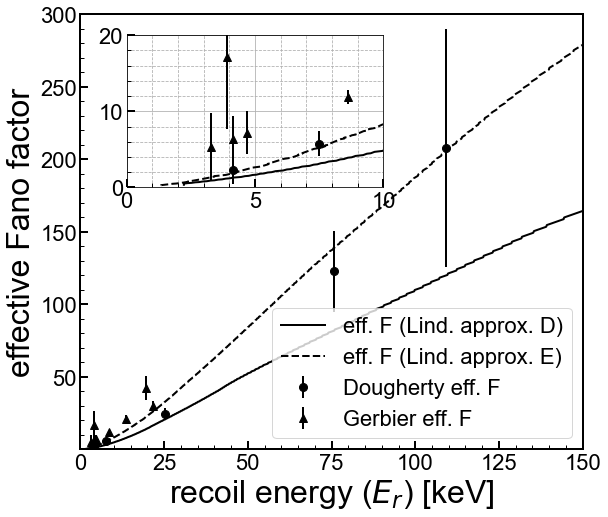

In [7]:
#set up a plot
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

xmax=10

ax1.errorbar(ddata_e,ddata_fluct_F,yerr=[ddata_fluct_F_err,ddata_fluct_F_err], marker='o', markersize=8, \
             ecolor='k',color='k', linestyle='none', label='Dougherty eff. F', linewidth=2)
ax1.errorbar(ddataG_e,ddata_fluct_F_G,yerr=[ddata_fluct_F_err_G,ddata_fluct_F_err_G], marker='^', markersize=8, \
             ecolor='k',color='k', linestyle='none', label='Gerbier eff. F', linewidth=2)


#ax1.plot (X, diff, 'm-', label='Thomas-Fermi (newgrad)')
#ax1.plot (Esi(epr), 100*np.sqrt(f_Omega2_eta2(epr))*ylindv(1000*Esi(epr)), 'g-', label='$\Omega/\epsilon$ (NAC III approx. D)')
ax1.plot (Esi(lindD_e), F_D_Si, 'k-', label='eff. F (Lind. approx. D)')
ax1.plot (Esi(lindE_e), F_E_Si, 'k--', label='eff. F (Lind. approx. E)')




ax1.set_yscale('linear')
ax1.set_xscale('linear')
ax1.set_xlim(Esi(0), 150)
ax1.set_ylim(0.1,300)
ax1.set_xlabel('recoil energy ($E_r$) [keV]')
ax1.set_ylabel('effective Fano factor')
#ax1.grid(True)
#ax1.xaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=4,prop={'size':22})

###Make inset
bbox_ll_x = 0.07
bbox_ll_y = -0.0225
bbox_w = 1
bbox_h = 1
eps = 0.01
axins = inset_axes(ax1, height="35%", width="55%", bbox_to_anchor=(bbox_ll_x,bbox_ll_y,bbox_w-bbox_ll_x,bbox_h), loc='upper left',bbox_transform=ax1.transAxes)
#ax1.add_patch(plt.Rectangle((bbox_ll_x, bbox_ll_y+eps), bbox_w-eps-bbox_ll_x, bbox_h-eps, ls="--", ec="c", fc="None",
#                           transform=ax1.transAxes))

#axins = plt.axes([0,0,1,1])
#axins_pos = InsetPosition(ax3, [0.25, 0.65, 0.7, 0.3])
#axins.set_axes_locator(axins_pos)

# larger region than the original image
x1, x2, y1, y2 = 0, 10, 0, 20
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)



axins.errorbar(ddata_e,ddata_fluct_F,yerr=[ddata_fluct_F_err,ddata_fluct_F_err], marker='o', markersize=8, \
             ecolor='k',color='k', linestyle='none', label='', linewidth=2)
axins.errorbar(ddataG_e,ddata_fluct_F_G,yerr=[ddata_fluct_F_err_G,ddata_fluct_F_err_G], marker='^', markersize=8, \
             ecolor='k',color='k', linestyle='none', label='', linewidth=2)
axins.plot (Esi(lindD_e), F_D_Si, 'k-', label='')
axins.plot (Esi(lindE_e), F_E_Si, 'k--', label='')

axins.yaxis.grid(True,which='minor',linestyle='--')
axins.xaxis.grid(True,which='minor',linestyle='--')
axins.grid(True)
####

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

#plt.tight_layout()
plt.savefig('figures/silicon_effectiveF_data.png')
plt.show()